#  Dimensionality Reduction with PCA

In [19]:
%matplotlib inline

# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set font scale and style
plt.rcParams.update({'font.size': 15})

from sklearn.model_selection import train_test_split

In [20]:
# Import custom class
%run -i '../src/helper/transfxn.py'

In [21]:
# Instantiate the class
transfxn = TransformationPipeline()

# Load data

In [4]:
df = pd.read_csv('../data/feat_engr_data.csv') # Load cleaned data
df = df.sample(frac =1).reset_index(drop = True) # shuffle
print('Data size',df.shape) # data size
df.head()

Data size (3817613, 42)


,c_year,c_mnth,c_wday,c_hour,class,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,conf_per_day,conf_per_hour,c_conf_ind,c_rcfg_ind,v_type_ind,p_psn_ind,c_wthr_ind,c_raln_ind,c_rsur_ind,c_traf_ind
0,2005,February,Saturday,21.0,0,1.0,Any other single-vehicle,At an intersection,Clear and sunny,"Dry, normal",...,0.600320,2.631484,N,N,N,N,N,N,N,N
1,2009,June,Saturday,17.0,0,2.0,Rear-end collision,Non-intersection,Clear and sunny,"Dry, normal",...,2.331089,3.980066,N,N,N,N,N,N,N,N
2,2001,August,Sunday,17.0,0,2.0,Right angle collision,At an intersection,Clear and sunny,"Dry, normal",...,1.316046,1.846882,N,N,N,N,N,N,N,N
3,1999,February,Monday,12.0,0,1.0,Ran off right shoulder,Non-intersection,Clear and sunny,Icy,...,0.264256,0.547466,N,N,N,N,N,N,N,N
4,2017,October,Friday,15.0,0,2.0,Right angle collision,At an intersection,Clear and sunny,"Dry, normal",...,0.947634,1.888882,N,N,N,N,N,N,N,N


# Create feature matrix & class label

In [5]:
# Reduce the dataset
X1, X2, y1, y2 = train_test_split(df, df['class'], test_size = 0.003, 
                                   random_state = 42, stratify = df['class']
                                    )

In [6]:
print('Large subset size:', X1.shape, y1.shape)
print('Small subset size:', X2.shape, y2.shape)

Large subset size: (3806160, 42) (3806160,)
Small subset size: (11453, 42) (11453,)


In [35]:
df.columns

Index(['c_year', 'c_mnth', 'c_wday', 'c_hour', 'class', 'c_vehs', 'c_conf',
       'c_rcfg', 'c_wthr', 'c_rsur', 'c_raln', 'c_traf', 'v_id', 'v_type',
       'v_year', 'p_id', 'p_sex', 'p_age', 'p_psn', 'p_isev', 'p_safe',
       'p_user', 'c_case', 'wday_ct', 'mnth_ct', 'year_ct', 'hour_ct',
       'hr_per_day', 'p_isev_ct', 'conf_ct', 'p_isev_per_day',
       'p_isev_per_hour', 'conf_per_day', 'conf_per_hour', 'c_conf_ind',
       'c_rcfg_ind', 'v_type_ind', 'p_psn_ind', 'c_wthr_ind', 'c_raln_ind',
       'c_rsur_ind', 'c_traf_ind'],
      dtype='object')

In [46]:
# Feature matrix and class label
cols_to_drop = ['c_case', 'p_id', 'v_id',  'class',
                'v_type_ind', 'p_psn_ind', 'c_wthr_ind', 
                'c_raln_ind', 'c_rsur_ind', 'c_traf_ind'
                ]
X, y = X2.drop(cols_to_drop, axis = 1), X2['class']

In [47]:
# Re-encode the class variable
y.replace({0:'Non-fatal', 1: 'Fatal'}, inplace=True)

# Transformation pipeline

In [48]:
# Transform and scale data
X_scaled, _,_ = transfxn.preprocessing(X, X)

In [49]:
print('Data size after pre-processing:', X_scaled.shape)

Data size after pre-processing: (11453, 142)


# PCA plot

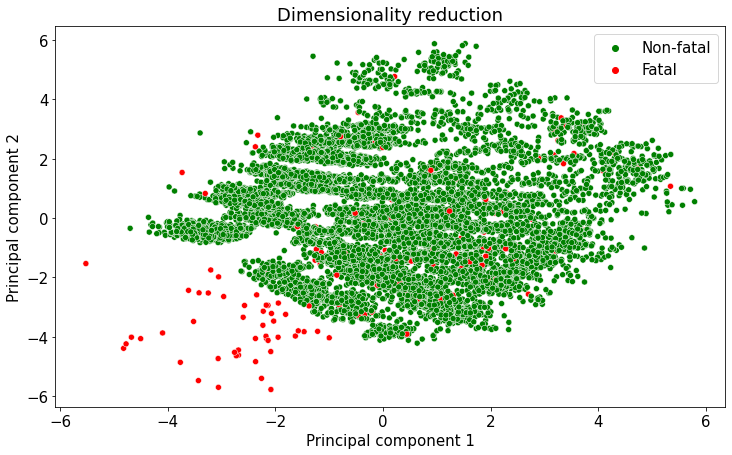

In [50]:
transfxn.pca_plot_labeled(X_scaled, y, palette = ['g', 'r'])